Develop a machine learning model that can accurately predict the price of a car
based on various features and attributes

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

Loading Dataset

In [2]:
data=pd.read_csv("data_car.csv")

In [3]:
data.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

EDA

In [4]:
data.shape

(11914, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
data.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [7]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Filling missing values

In [8]:
for i in [data]:
  
  i['Engine Fuel Type'] = i['Engine Fuel Type'].fillna(data['Engine Fuel Type'].dropna().mode()[0])
  i['Engine HP']=i['Engine HP'].fillna(data['Engine HP'].dropna().mean())
  i['Engine Cylinders']=i['Engine Cylinders'].fillna(data['Engine Cylinders'].dropna().mean())
  i['Market Category']=i['Market Category'].fillna(data['Market Category'].dropna().mode()[0])
  i['Number of Doors']=i['Number of Doors'].fillna(data['Number of Doors'].dropna().mean())

In [9]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [10]:
import datetime
date_time = datetime.datetime.now()
data['Age']=date_time.year - data['Year']
data.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  Age  
0           26        19        3916  46135   12  
1           28        19        3916  40650   12  
2           28        20        3916  36350   12  
3           28        18        3916  29450   12  
4           28        18        3916  34500   12

In [52]:
pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00


In [53]:
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

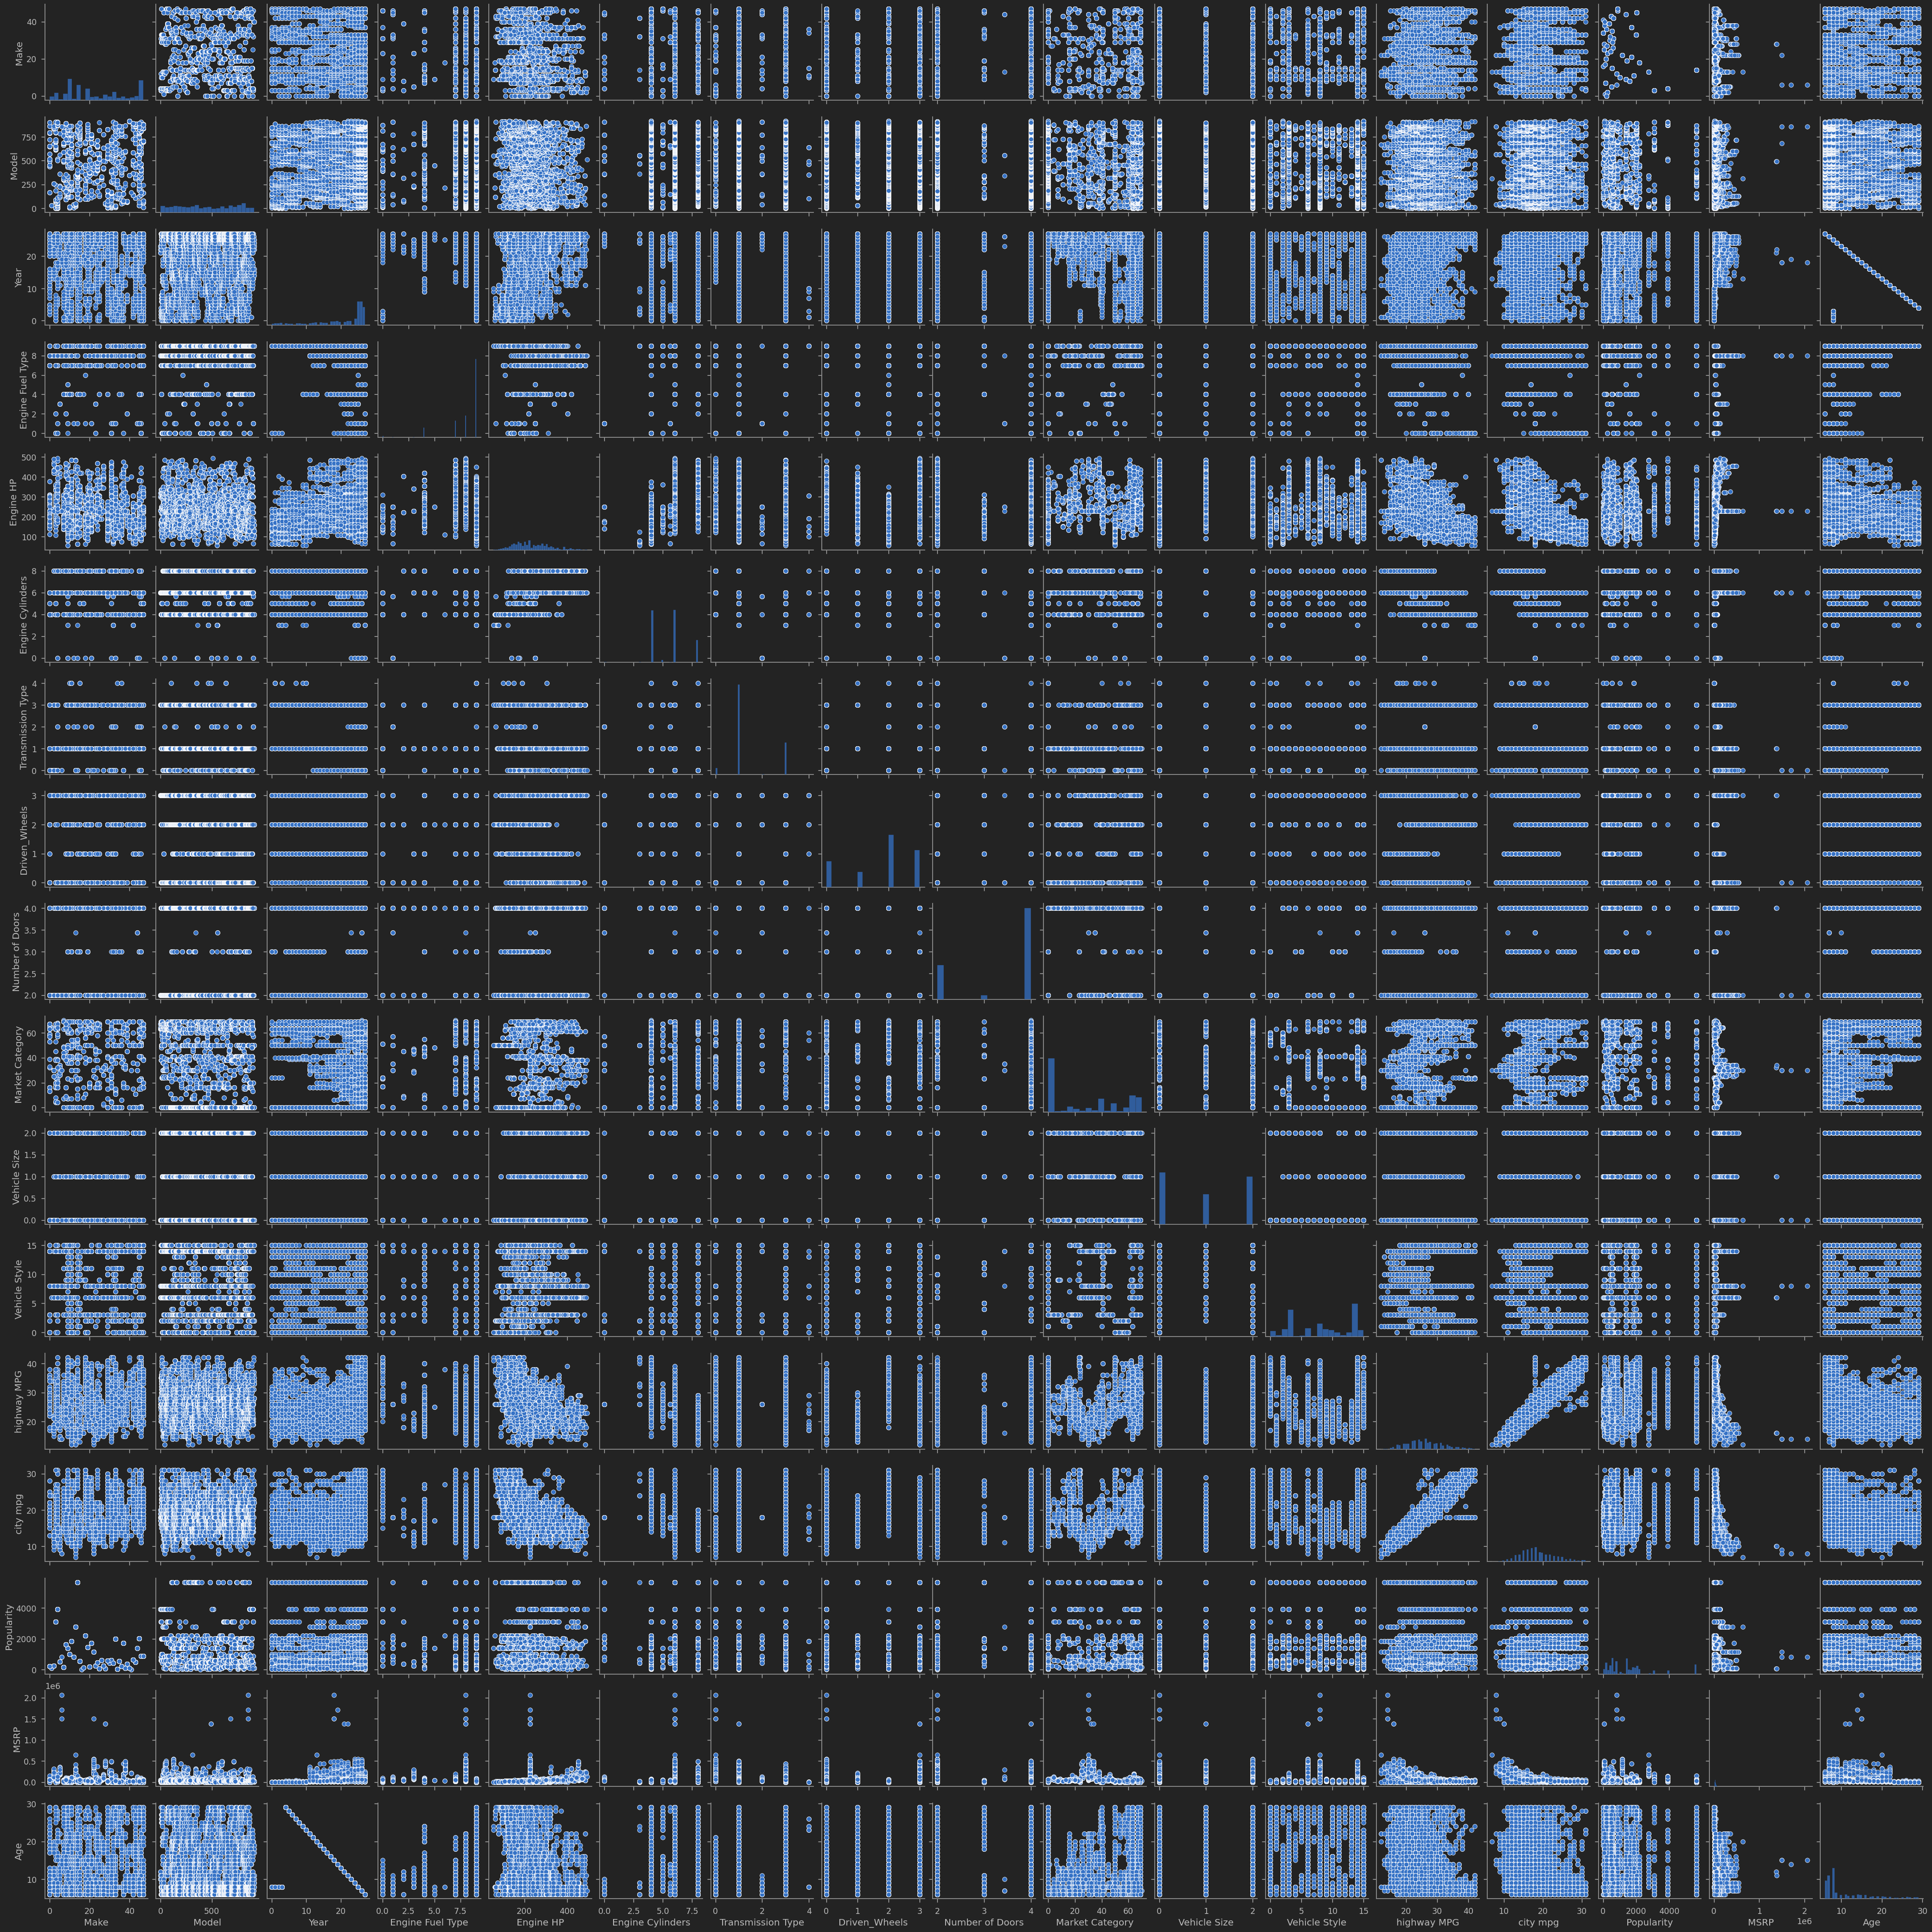

In [54]:
sns.pairplot(data)


In [11]:
org_data=data.copy()

Label Encoding

In [12]:
le=LabelEncoder()
data["Make"]=le.fit_transform(data["Make"])
data["Model"]=le.fit_transform(data["Model"])
data["Engine Fuel Type"]=le.fit_transform(data["Engine Fuel Type"])
data["Transmission Type"]=le.fit_transform(data["Transmission Type"])
data["Driven_Wheels"]=le.fit_transform(data["Driven_Wheels"])
data["Market Category"]=le.fit_transform(data["Market Category"])
data["Vehicle Size"]=le.fit_transform(data["Vehicle Size"])
data["Vehicle Style"]=le.fit_transform(data["Vehicle Style"])
data["Year"]=le.fit_transform(data["Year"])
data

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0         4      1    21                 8      335.0               6.0   
1         4      0    21                 8      300.0               6.0   
2         4      0    21                 8      300.0               6.0   
3         4      0    21                 8      230.0               6.0   
4         4      0    21                 8      230.0               6.0   
...     ...    ...   ...               ...        ...               ...   
11909     0    901    22                 8      300.0               6.0   
11910     0    901    22                 8      300.0               6.0   
11911     0    901    22                 8      300.0               6.0   
11912     0    901    23                 7      300.0               6.0   
11913    25    902    16                 9      221.0               6.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                      3              3              2.0               38   
1                      3              3              2.0               67   
2                      3              3              2.0               64   
3                      3              3              2.0               67   
4                      3              3              2.0               63   
...                  ...            ...              ...              ...   
11909                  1              0              4.0               13   
11910                  1              0              4.0               13   
11911                  1              0              4.0               13   
11912                  1              0              4.0               13   
11913                  1              2              4.0               63   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
0                 0              8           26        19        3916  46135   
1                 0              6           28        19        3916  40650   
2                 0              8           28        20        3916  36350   
3                 0              8           28        18        3916  29450   
4                 0              6           28        18        3916  34500   
...             ...            ...          ...       ...         ...    ...   
11909             2              2           23        16         204  46120   
11910             2              2           23        16         204  56670   
11911             2              2           23        16         204  50620   
11912             2              2           23        16         204  50920   
11913             2             14           26        17          61  28995   

       Age  
0       12  
1       12  
2       12  
3       12  
4       12  
...    ...  
11909   11  
11910   11  
11911   11  
11912   10  
11913   17  

[11914 rows x 17 columns]

Plotting boxplot

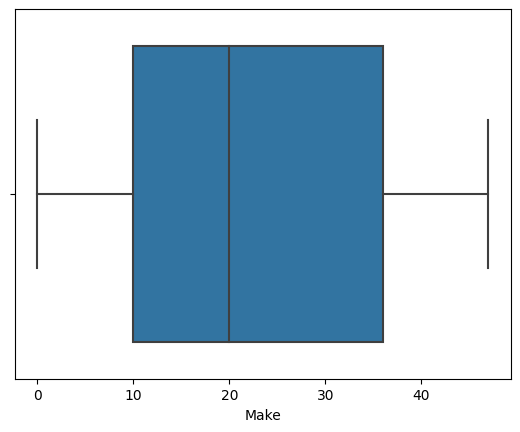

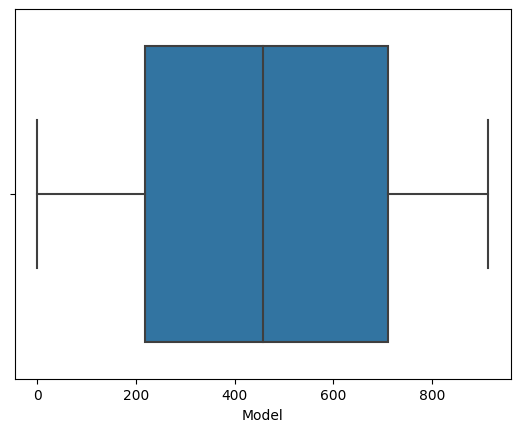

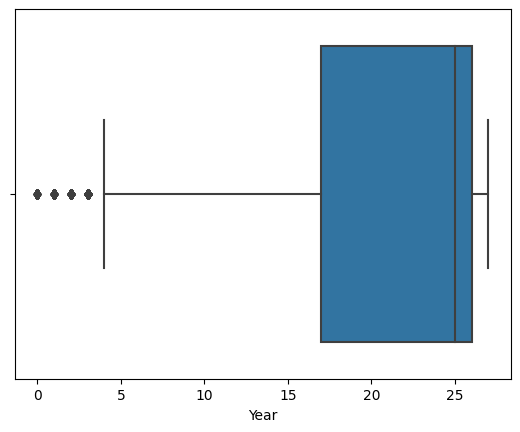

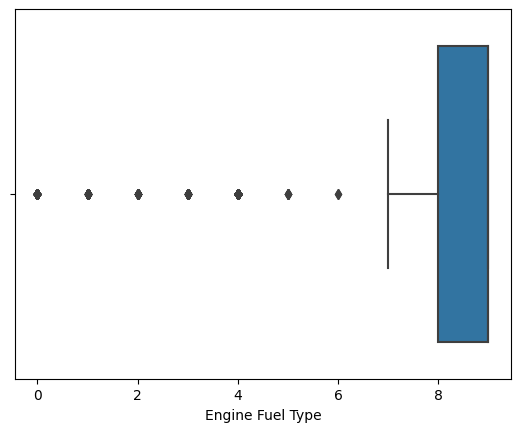

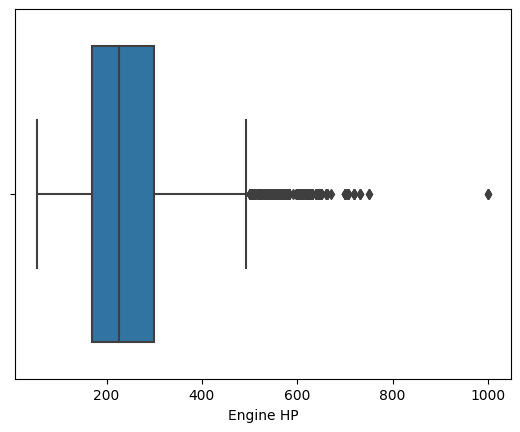

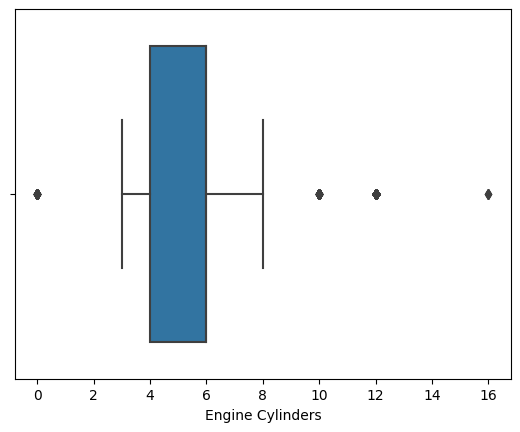

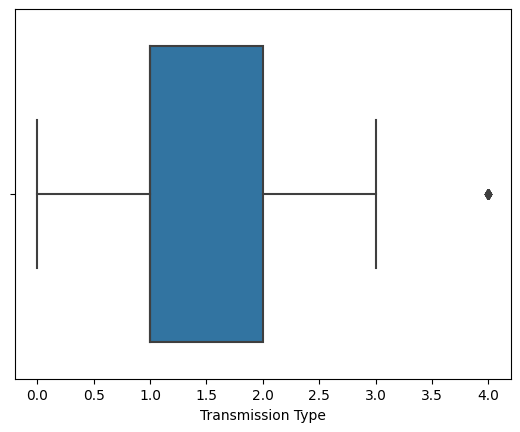

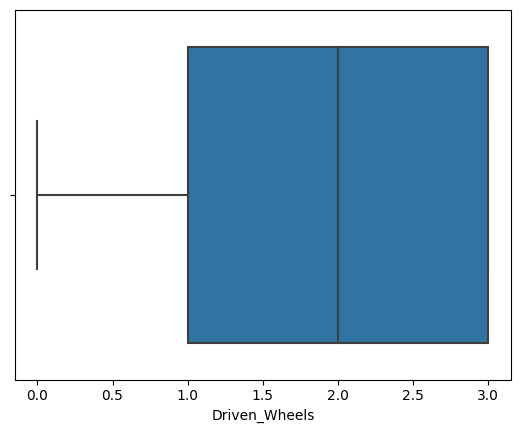

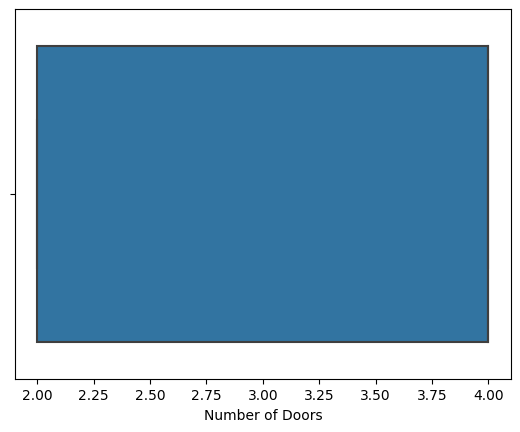

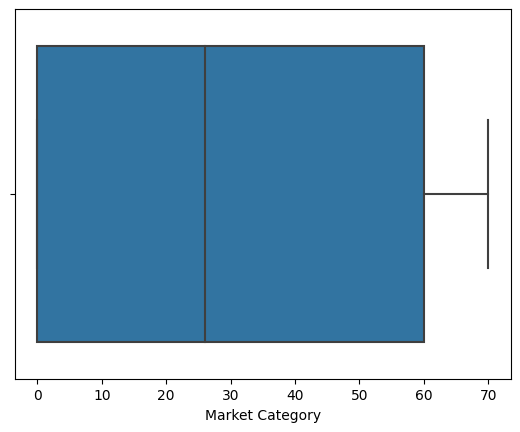

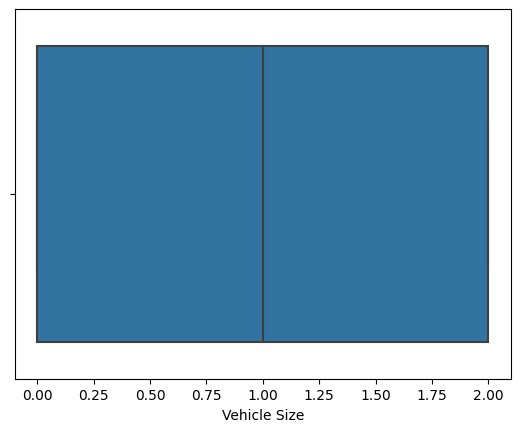

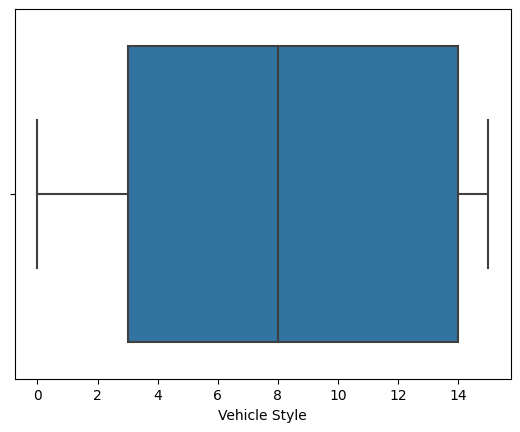

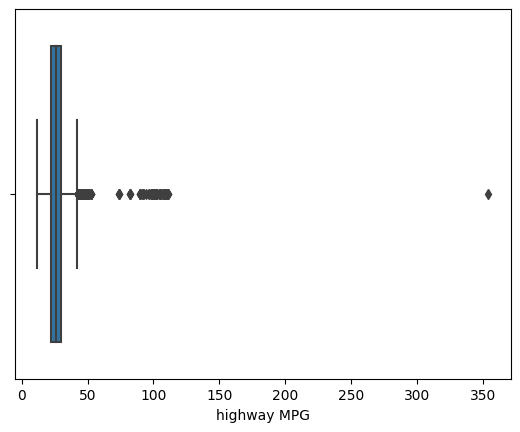

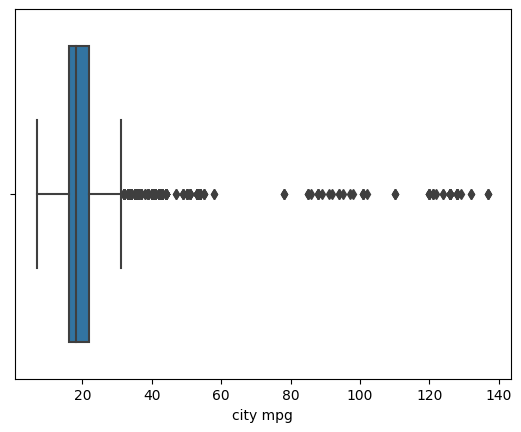

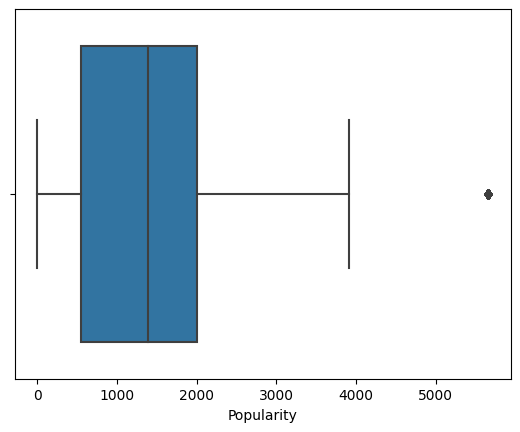

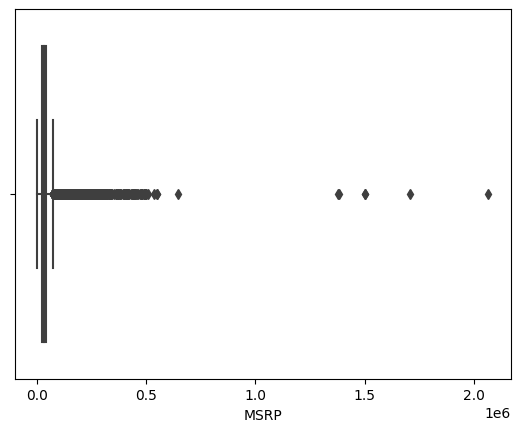

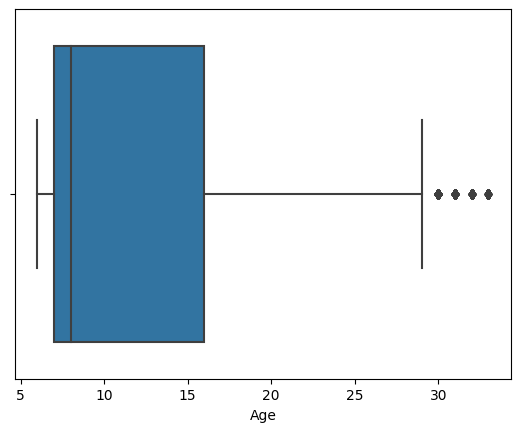

In [13]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

Outliers removal

In [14]:
iqr = stats.iqr(data['Year'], interpolation='midpoint')
print(iqr)

9.0


In [15]:
q1 = data['Year'].quantile(0.25)
q3 = data['Year'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['Year'] < min_limit]
outliers_upper = data.loc[data['Year'] > max_limit]

data.loc[data['Year'] > max_limit, 'Year'] = np.median(data['Year'])

outliers_lower
outliers_upper

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP, Age]
Index: []

In [16]:
iqr = stats.iqr(data['Age'], interpolation='midpoint')
print(iqr)

9.0


In [17]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['Age'] < min_limit]
outliers_upper = data.loc[data['Age'] > max_limit]

data.loc[data['Age'] >max_limit, 'Age'] = np.median(data['Age'])

outliers_lower
outliers_upper

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
17        3      2     2                 9      172.0               6.0   
18        3      2     2                 9      172.0               6.0   
19        3      2     2                 9      172.0               6.0   
20        3      2     2                 9      172.0               6.0   
21        3      2     2                 9      172.0               6.0   
...     ...    ...   ...               ...        ...               ...   
11376     0    859     3                 9      176.0               5.0   
11377     0    859     3                 9      176.0               5.0   
11792    42    886     1                 9       97.0               4.0   
11793    42    886     1                 9      145.0               6.0   
11794    42    886     1                 9      145.0               6.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
17                     3              2              4.0               63   
18                     3              2              4.0               63   
19                     1              0              4.0               63   
20                     3              2              4.0               63   
21                     3              0              4.0               63   
...                  ...            ...              ...              ...   
11376                  3              2              4.0               63   
11377                  3              2              4.0               63   
11792                  3              2              2.0                0   
11793                  1              2              2.0                0   
11794                  3              0              2.0                0   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  MSRP  \
17                2             14           24        17        3105  2000   
18                2             14           24        17        3105  2000   
19                2             15           20        16        3105  2000   
20                2             14           24        17        3105  2000   
21                2             14           21        16        3105  2000   
...             ...            ...          ...       ...         ...   ...   
11376             2             14           24        18         204  2000   
11377             2             14           24        18         204  2000   
11792             0              8           29        22         640  2000   
11793             0              8           26        18         640  2000   
11794             0              8           23        16         640  2000   

       Age  
17      31  
18      31  
19      31  
20      31  
21      31  
...    ...  
11376   30  
11377   30  
11792   32  
11793   32  
11794   32  

[661 rows x 17 columns]

In [18]:
iqr = stats.iqr(data['Engine Fuel Type'], interpolation='midpoint')
print(iqr)

1.0


In [19]:
q1 = data['Engine Fuel Type'].quantile(0.25)
q3 = data['Engine Fuel Type'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['Engine Fuel Type'] < min_limit]
outliers_upper = data.loc[data['Engine Fuel Type'] > max_limit]

data.loc[data['Engine Fuel Type'] > max_limit, 'Engine Fuel Type'] = np.median(data['Engine Fuel Type'])

outliers_lower
outliers_upper

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP, Age]
Index: []

In [20]:
iqr = stats.iqr(data['Engine HP'], interpolation='midpoint')
print(iqr)

130.0


In [21]:
q1 = data['Engine HP'].quantile(0.25)
q3 = data['Engine HP'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['Engine HP'] < min_limit]
outliers_upper = data.loc[data['Engine HP'] > max_limit]

data.loc[data['Engine HP'] >max_limit, 'Engine HP'] = np.median(data['Engine HP'])

outliers_lower
outliers_upper

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
466      13     29    23                 8      562.0               8.0   
467      13     29    23                 8      562.0               8.0   
468      13     29    24                 8      562.0               8.0   
469      13     29    24                 8      597.0               8.0   
470      13     29    24                 8      562.0               8.0   
...     ...    ...   ...               ...        ...               ...   
11509     4    873    26                 8      567.0               8.0   
11510     4    873    27                 8      567.0               8.0   
11523     4    875    25                 8      567.0               8.0   
11524     4    875    26                 8      567.0               8.0   
11525     4    875    27                 8      567.0               8.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
466                    0              3              2.0               30   
467                    0              3              2.0               30   
468                    0              3              2.0               30   
469                    0              3              2.0               30   
470                    0              3              2.0               30   
...                  ...            ...              ...              ...   
11509                  1              0              4.0                4   
11510                  1              0              4.0                4   
11523                  1              0              4.0                4   
11524                  1              0              4.0                4   
11525                  1              0              4.0                4   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity    MSRP  \
466               0              6           17        13        2774  257412   
467               0              8           17        13        2774  233509   
468               0              8           17        13        2774  233509   
469               0              8           17        13        2774  288000   
470               0              6           17        13        2774  257412   
...             ...            ...          ...       ...         ...     ...   
11509             2              3           19        14        3916   98800   
11510             2              3           19        14        3916   98800   
11523             2              3           19        14        3916  102100   
11524             2              3           19        14        3916  102200   
11525             2              3           19        14        3916  102200   

       Age  
466     10  
467     10  
468      9  
469      9  
470      9  
...    ...  
11509    7  
11510    6  
11523    8  
11524    7  
11525    6  

[509 rows x 17 columns]

In [22]:
iqr = stats.iqr(data['Engine Cylinders'], interpolation='midpoint')
print(iqr)

2.0


In [23]:
q1 = data['Engine Cylinders'].quantile(0.25)
q3 = data['Engine Cylinders'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['Engine Cylinders'] < min_limit]
outliers_upper = data.loc[data['Engine Cylinders'] > max_limit]

data.loc[data['Engine Cylinders'] > max_limit, 'Engine Cylinders'] = np.median(data['Engine Cylinders'])

outliers_lower
outliers_upper

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
460      13     28    11                 8      442.0              12.0   
461      13     28    11                 8      442.0              12.0   
462      13     28    12                 8      442.0              12.0   
463      13     28    12                 8      442.0              12.0   
464      13     28    13                 8      442.0              12.0   
...     ...    ...   ...               ...        ...               ...   
11394     2    861    22                 8      490.0              12.0   
11395     2    861    22                 8      490.0              12.0   
11448    38    867    24                 8      227.0              12.0   
11449    38    867    25                 8      227.0              12.0   
11450    38    867    26                 8      227.0              12.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
460                    1              3              2.0               30   
461                    3              3              2.0               30   
462                    1              3              2.0               30   
463                    3              3              2.0               30   
464                    1              3              2.0               30   
...                  ...            ...              ...              ...   
11394                  1              3              2.0               30   
11395                  1              3              2.0               30   
11448                  1              3              2.0               32   
11449                  1              3              2.0               32   
11450                  1              3              2.0               32   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity    MSRP  \
460               0              8           14         9        2774  223970   
461               0              8           15         9        2774  219775   
462               0              8           14         9        2774  228625   
463               0              8           15         9        2774  224585   
464               0              8           14         9        2774  228625   
...             ...            ...          ...       ...         ...     ...   
11394             2              8           18        13         259  208295   
11395             2              6           18        13         259  223295   
11448             1              8           21        13          86  284900   
11449             1              8           21        13          86  294025   
11450             1              8           21        13          86  304350   

       Age  
460     22  
461     22  
462     21  
463     21  
464     20  
...    ...  
11394   11  
11395   11  
11448    9  
11449    8  
11450    7  

[301 rows x 17 columns]

In [24]:
iqr = stats.iqr(data['highway MPG'], interpolation='midpoint')
print(iqr)

8.0


In [25]:
q1 = data['highway MPG'].quantile(0.25)
q3 = data['highway MPG'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['highway MPG'] < min_limit]
outliers_upper = data.loc[data['highway MPG'] > max_limit]

data.loc[data['highway MPG'] > max_limit, 'highway MPG'] = np.median(data['highway MPG'])

outliers_lower
outliers_upper

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
135      4     12    25                 0  180.00000               4.0   
140      4     12    25                 0  180.00000               4.0   
142      4     12    25                 0  180.00000               4.0   
539     12     39    25                 1  249.38607               0.0   
540     12     39    26                 1  249.38607               0.0   
...    ...    ...   ...               ...        ...               ...   
9868     9    770    24                 1  140.00000               0.0   
9869     9    770    25                 1  140.00000               0.0   
9870     9    770    25                 1  140.00000               0.0   
9871     9    770    26                 1  140.00000               0.0   
9872     9    770    26                 1  140.00000               0.0   

      Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
135                   1              3              4.0               24   
140                   1              0              4.0               24   
142                   1              0              4.0               24   
539                   2              2              2.0               50   
540                   2              2              2.0               50   
...                 ...            ...              ...              ...   
9868                  2              2              4.0               50   
9869                  2              2              4.0               50   
9870                  2              2              4.0               50   
9871                  2              2              4.0               50   
9872                  2              2              4.0               50   

      Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
135              2             14           45        32        3916  39000   
140              2             15           43        31        3916  43450   
142              2             14           43        31        3916  41000   
539              0              0          108       122         819  31800   
540              0              0          103       121         819  31800   
...            ...            ...          ...       ...         ...    ...   
9868             0              2          109       128        1385  27010   
9869             0              2          109       128        1385  25170   
9870             0              2          109       128        1385  25560   
9871             0              2          109       128        1385  25510   
9872             0              2          109       128        1385  25120   

      Age  
135     8  
140     8  
142     8  
539     8  
540     7  
...   ...  
9868    9  
9869    8  
9870    8  
9871    7  
9872    7  

[192 rows x 17 columns]

In [26]:
iqr = stats.iqr(data['city mpg'], interpolation='midpoint')
print(iqr)

6.0


In [27]:
q1 = data['city mpg'].quantile(0.25)
q3 = data['city mpg'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

outliers_lower = data.loc[data['city mpg'] < min_limit]
outliers_upper = data.loc[data['city mpg'] > max_limit]

data.loc[data['city mpg'] >max_limit, 'city mpg'] = np.median(data['city mpg'])

outliers_lower
outliers_upper

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
135       4     12    25                 0  180.00000               4.0   
146       4     12    26                 0  180.00000               4.0   
161       4     12    27                 0  180.00000               4.0   
539      12     39    25                 1  249.38607               0.0   
540      12     39    26                 1  249.38607               0.0   
...     ...    ...   ...               ...        ...               ...   
10792    29    827    18                 9  133.00000               4.0   
10795    29    827    18                 9  133.00000               4.0   
10796    29    827    19                 9  177.00000               4.0   
10797    29    827    19                 9  177.00000               4.0   
11810    45    892    27                 9  106.00000               4.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
135                    1              3              4.0               24   
146                    1              3              4.0               24   
161                    1              3              4.0               24   
539                    2              2              2.0               50   
540                    2              2              2.0               50   
...                  ...            ...              ...              ...   
10792                  1              2              4.0               15   
10795                  1              2              4.0               15   
10796                  1              2              4.0               15   
10797                  1              2              4.0               15   
11810                  1              2              4.0                0   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
135               2             14           26        32        3916  39000   
146               2             14           42        32        3916  39850   
161               2             14           42        32        3916  40250   
539               0              0           26       122         819  31800   
540               0              0           26       121         819  31800   
...             ...            ...          ...       ...         ...    ...   
10792             0              3           30        34         586  27995   
10795             0              3           30        34         586  25485   
10796             0              3           31        34         586  29175   
10797             0              3           31        34         586  31695   
11810             0             14           40        32        2031  17050   

       Age  
135      8  
146      7  
161      6  
539      8  
540      7  
...    ...  
10792   15  
10795   15  
10796   14  
10797   14  
11810    6  

[316 rows x 17 columns]

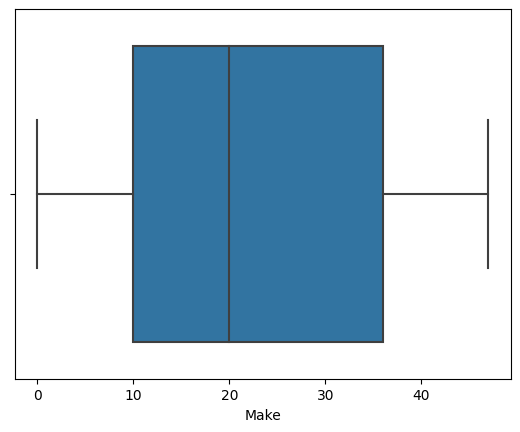

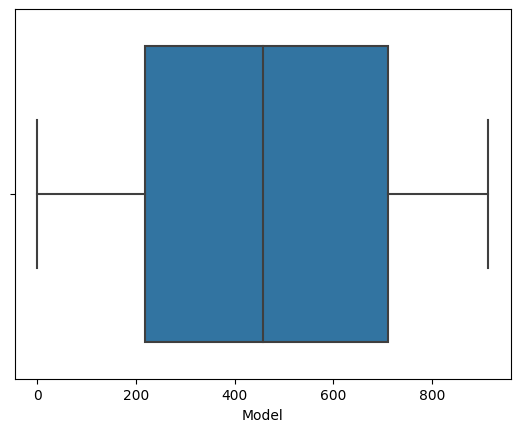

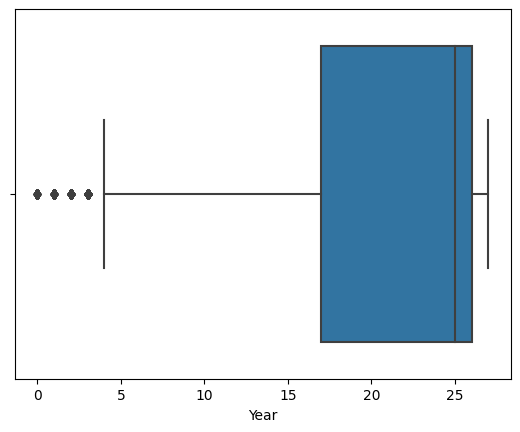

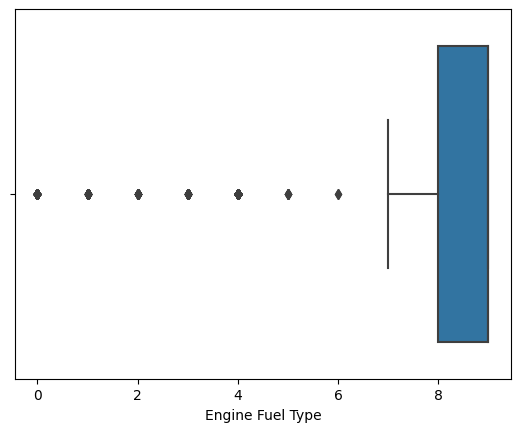

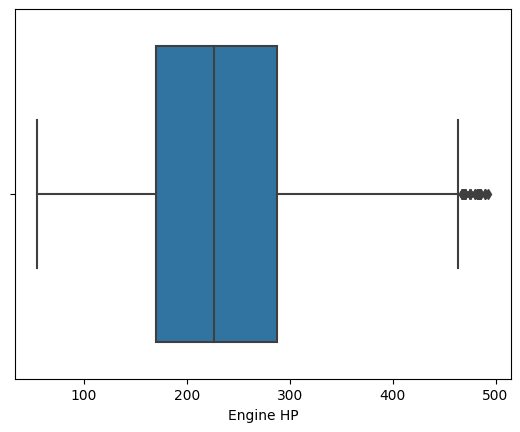

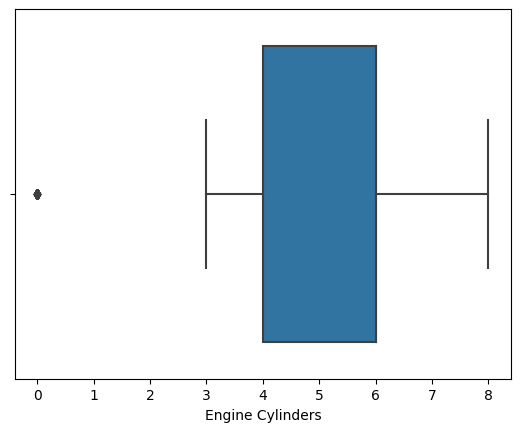

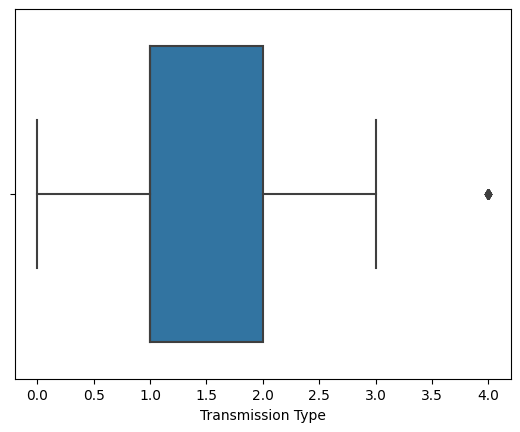

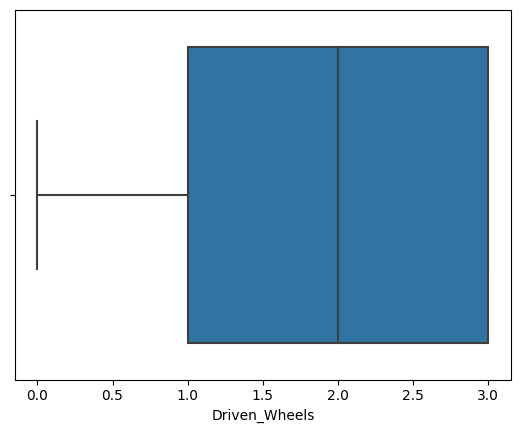

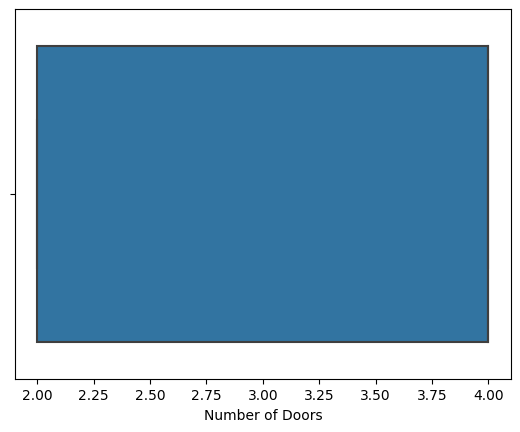

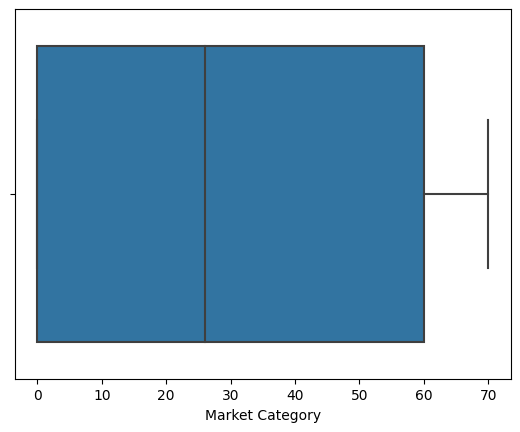

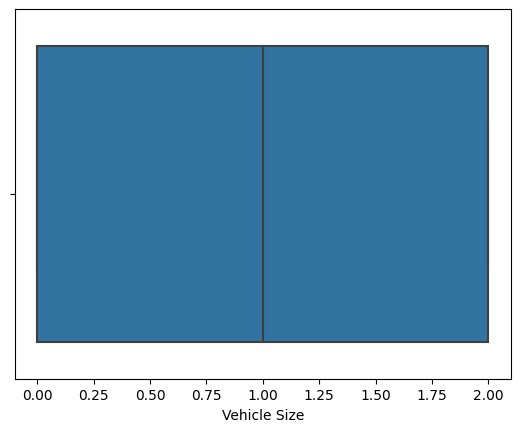

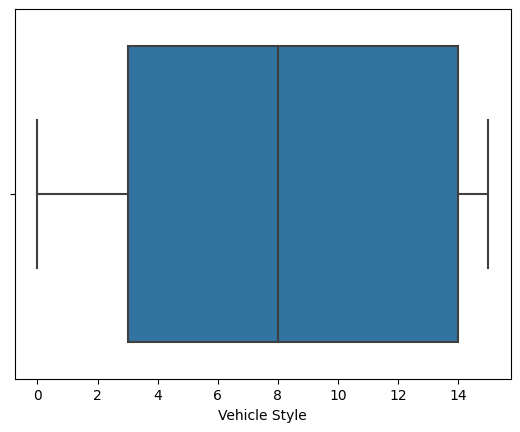

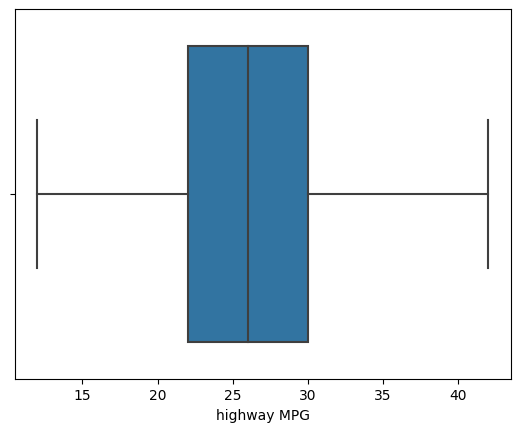

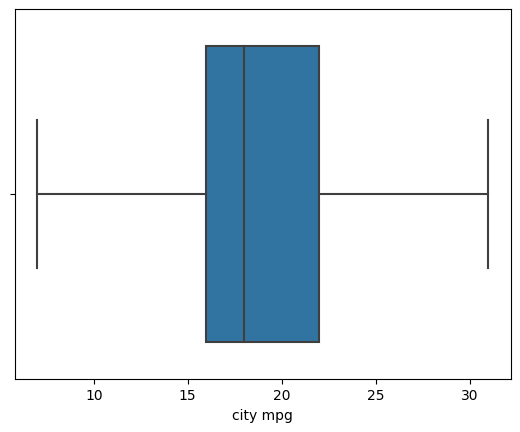

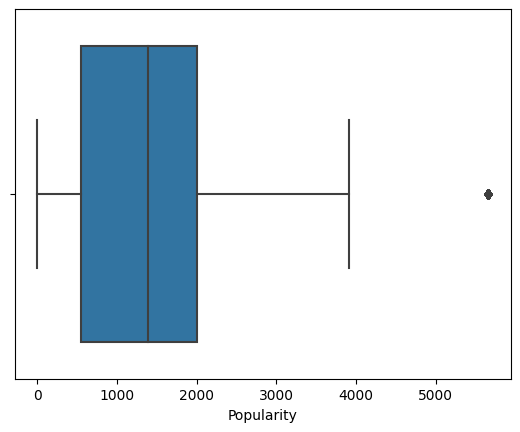

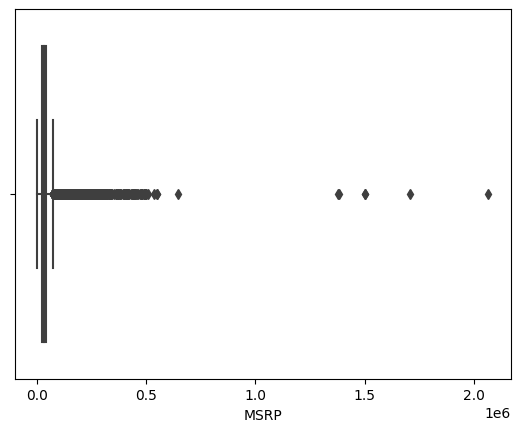

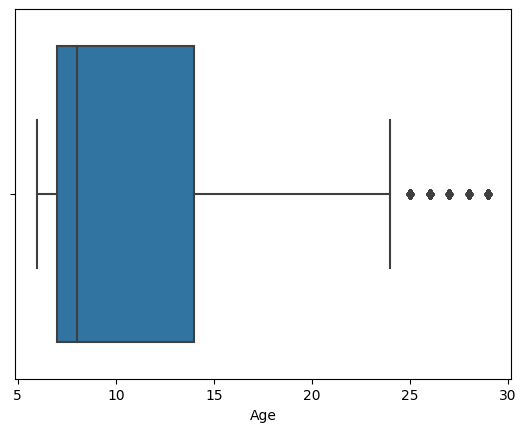

In [28]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

<Axes: >

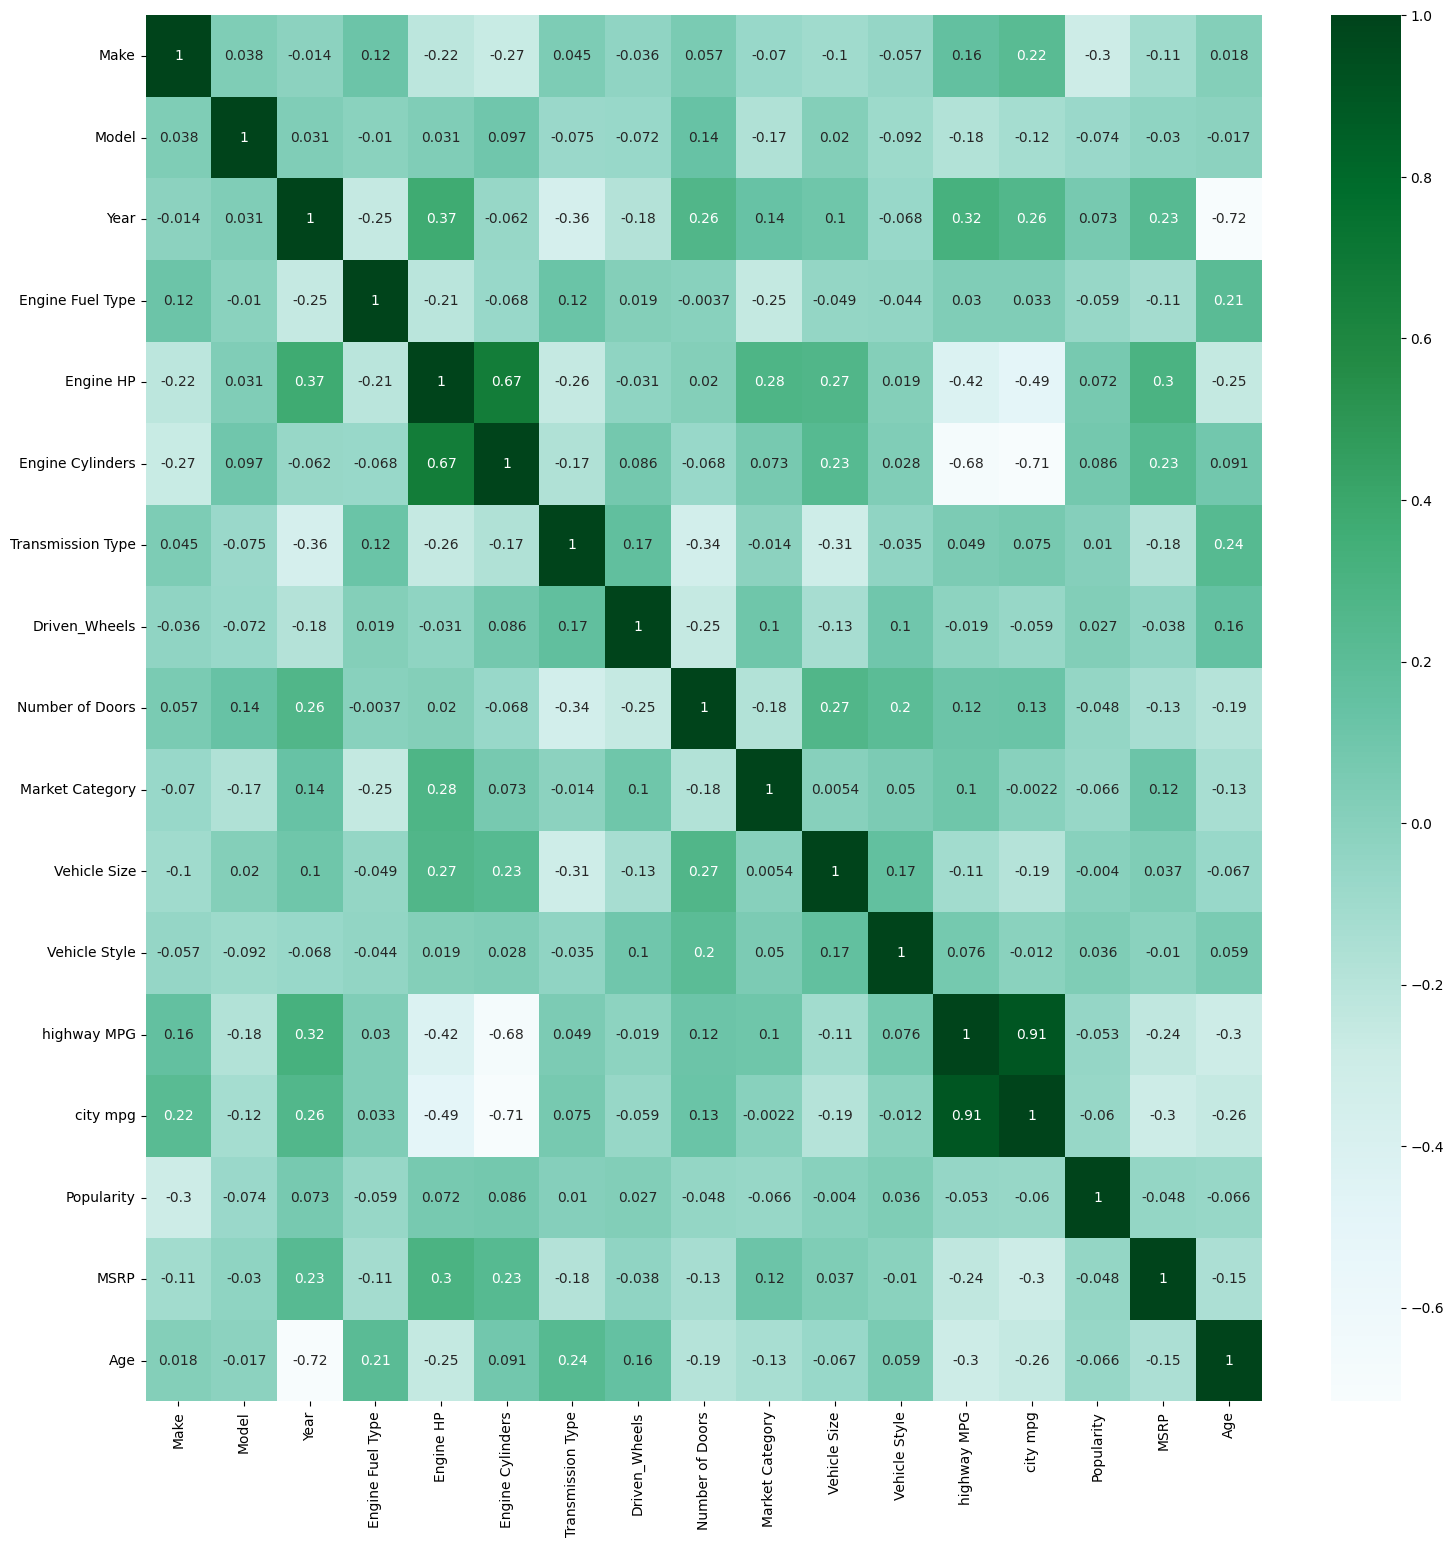

In [29]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), cmap= "BuGn", annot=True)

Assigning dependent variabel as y and independent variable as X

In [32]:
X = data.drop(['Model','MSRP'],axis=1)
y = data['MSRP']

In [33]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


Importing the models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Model training

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Prediction on Test Data


In [38]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

Evaluating the Algorithm


In [39]:
from sklearn import metrics


In [40]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)


In [41]:
print(score1,score2,score3,score4)

0.3106858296946826 0.9631871038331877 0.9105517887640119 0.9484410416395592


In [42]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [43]:
final_data


Models  R2_SCORE
0     LR  0.310686
1     RF  0.963187
2    GBR  0.910552
3     XG  0.948441

Save The Model

In [45]:

xg = XGBRegressor()
xg_final = xg.fit(X,y)

In [46]:
import joblib


In [47]:
joblib.dump(xg_final,'car_price_predictor')


['car_price_predictor']

In [48]:
model = joblib.load('car_price_predictor')